In [1]:
# First, ensure seaborn is installed (run in Jupyter or terminal)
!pip install seaborn --upgrade

# Then correct the style setting:
import seaborn as sns
sns.set_style("whitegrid")  # Correct way to set style
sns.set_palette("husl")

# Alternative styles you can use:
# "darkgrid", "whitegrid", "dark", "white", "ticks"


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Proper imports and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles correctly
sns.set_style("whitegrid")
sns.set_palette("husl")
%matplotlib inline

# Load the cleaned data you saved
try:
    df = pd.read_csv('../data/cleaned_jobs_data.csv')
    print("Data loaded successfully! Shape:", df.shape)
except FileNotFoundError:
    print("Error: Run Phase 2 cleaning first to create cleaned data file!")

Data loaded successfully! Shape: (30000, 16)


Numerical variable

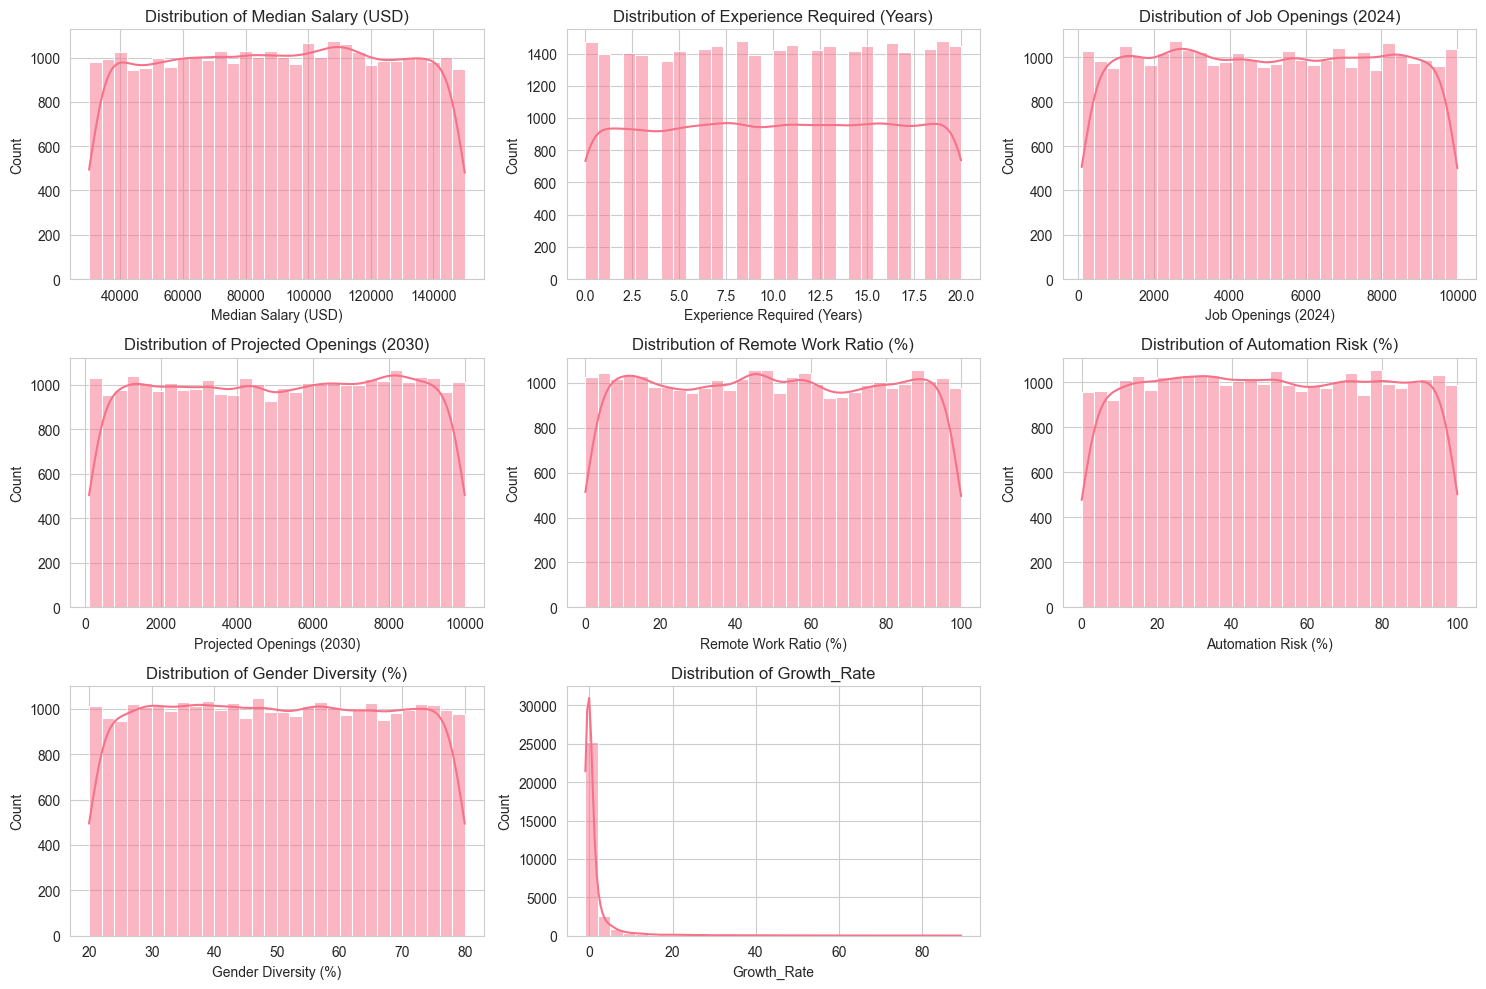


Descriptive Statistics:


count          mean           std          min  \
Median Salary (USD)          30000.0  90119.965639  34412.013953  30001.86000   
Experience Required (Years)  30000.0     10.051433      6.060678      0.00000   
Job Openings (2024)          30000.0   5039.640833   2861.009654    100.00000   
Projected Openings (2030)    30000.0   5074.218100   2866.550722    100.00000   
Remote Work Ratio (%)        30000.0     49.836431     28.966688      0.00000   
Automation Risk (%)          30000.0     50.154229     28.754889      0.00000   
Gender Diversity (%)         30000.0     49.979660     17.274665     20.00000   
Growth_Rate                  30000.0      1.410352      5.566523     -0.98937   

                                      25%           50%            75%  \
Median Salary (USD)          60500.702500  90274.115000  119454.710000   
Experience Required (Years)      5.000000     10.000000      15.000000   
Job Openings (2024)           2570.000000   5034.000000    7527.000000   
Projected Openings (2030)     2586.750000   5106.500000    7573.000000   
Remote Work Ratio (%)           24.570000     49.570000      75.100000   
Automation Risk (%)             25.400000     50.020000      75.030000   
Gender Diversity (%)            35.070000     49.885000      64.910000   
Growth_Rate                     -0.493665      0.003038       0.975831   

                                      max  
Median Salary (USD)          149998.50000  
Experience Required (Years)      20.00000  
Job Openings (2024)           10000.00000  
Projected Openings (2030)     10000.00000  
Remote Work Ratio (%)           100.00000  
Automation Risk (%)              99.99000  
Gender Diversity (%)             80.00000  
Growth_Rate                      89.45098

In [4]:
# Select numerical columns
num_cols = ['Median Salary (USD)', 'Experience Required (Years)', 
            'Job Openings (2024)', 'Projected Openings (2030)',
            'Remote Work Ratio (%)', 'Automation Risk (%)', 
            'Gender Diversity (%)', 'Growth_Rate']

# Plot distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Summary statistics
print("\nDescriptive Statistics:")
display(df[num_cols].describe().T)

Categorical Variables

In [5]:
# Select categorical columns
cat_cols = ['Job Status', 'AI Impact Level', 'Required Education', 
            'Industry', 'Location', 'Risk_Category', 'Seniority']

# Plot distributions
plt.figure(figsize=(15, 20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 2, i)
    if df[col].nunique() > 10:  # For columns with many categories
        sns.countplot(y=col, data=df, order=df[col].value_counts().index[:10])
    else:
        sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Frequency tables
for col in cat_cols:
    print(f"\n{col} Value Counts:")
    display(pd.DataFrame(df[col].value_counts(normalize=True).T)

SyntaxError: incomplete input (4103603411.py, line 21)

Numeric vs Numeric

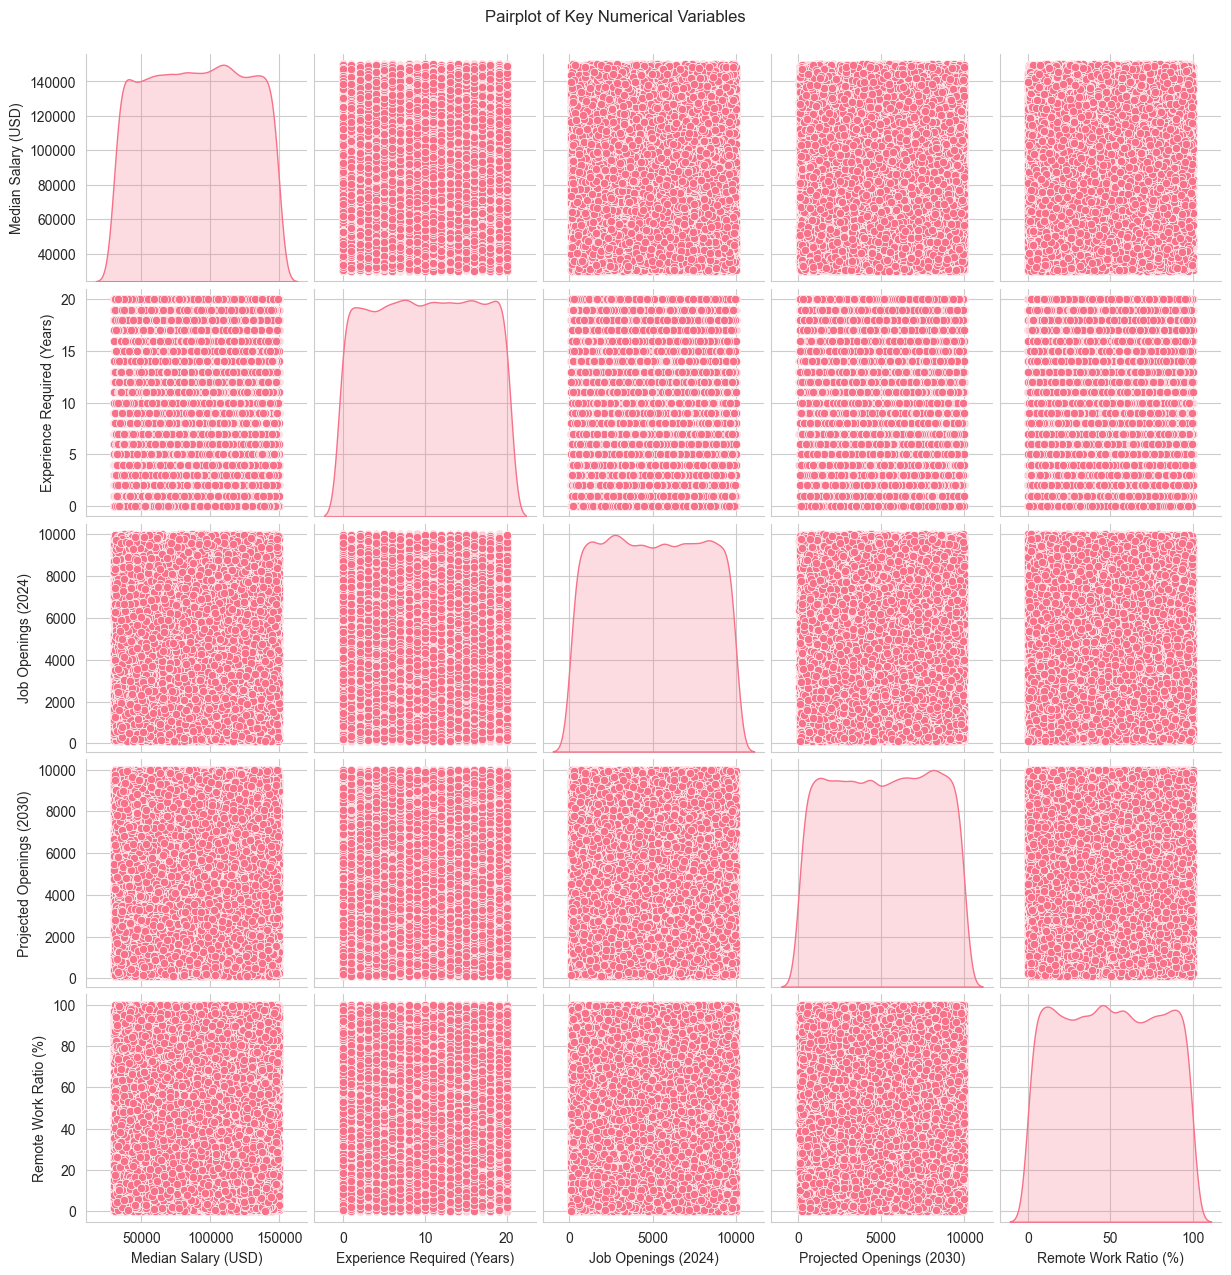

In [6]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr = df[num_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Scatter plot matrix
sns.pairplot(df[num_cols[:5]], diag_kind='kde')
plt.suptitle('Pairplot of Key Numerical Variables', y=1.02)
plt.show()

Categorical vs Numeric

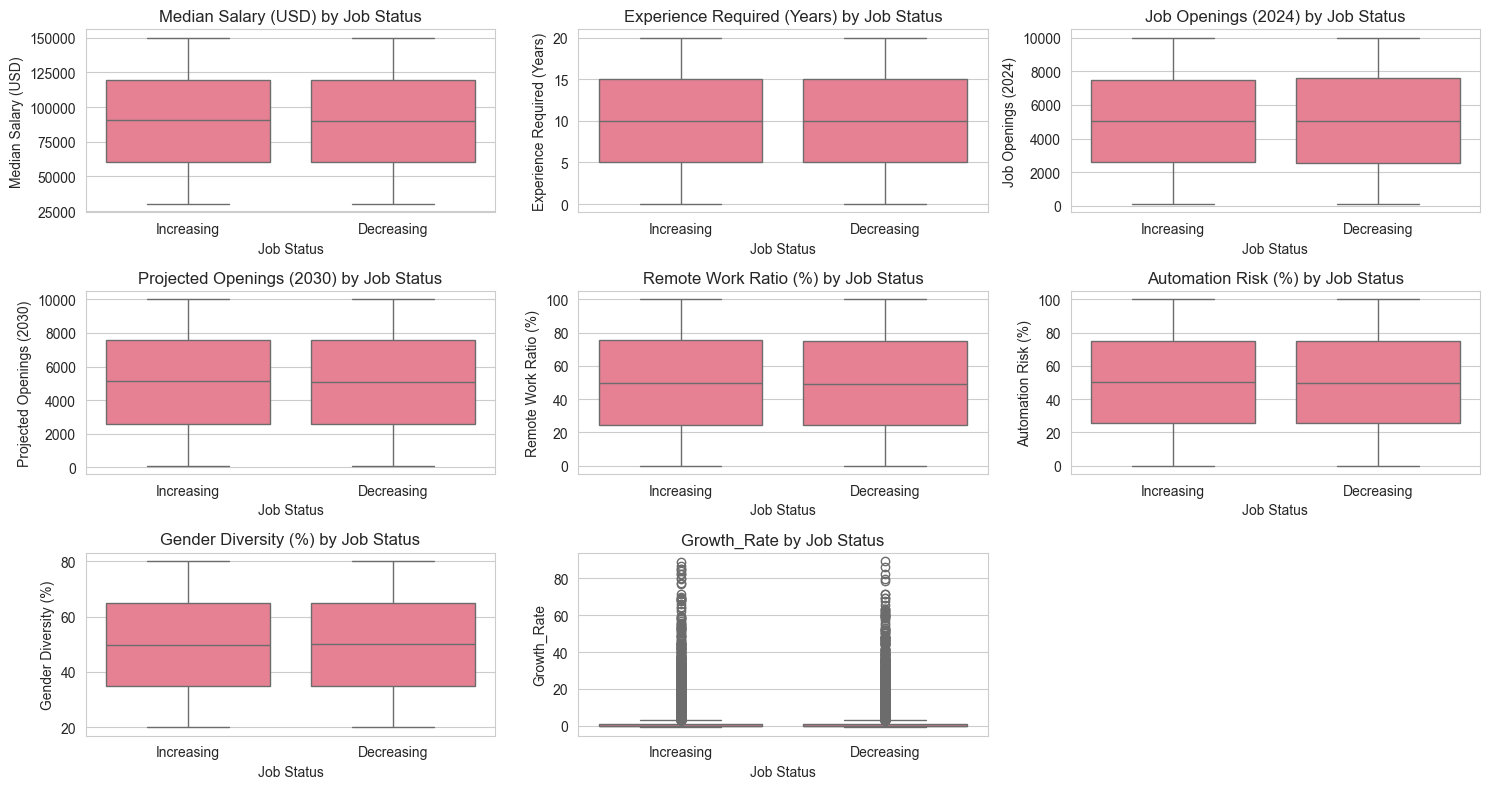

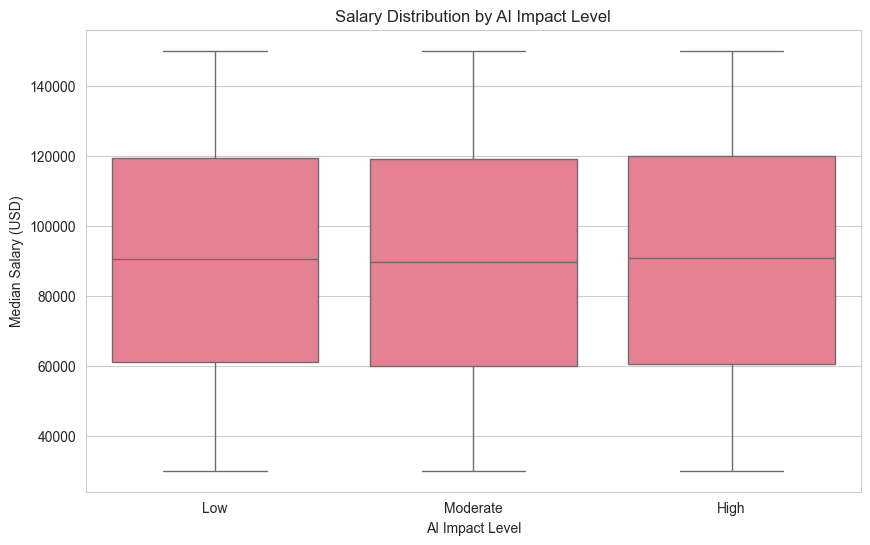

In [7]:
# Job Status vs Numerical Features
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Job Status', y=col, data=df)
    plt.title(f'{col} by Job Status')
plt.tight_layout()
plt.show()

# AI Impact Level vs Salary
plt.figure(figsize=(10, 6))
sns.boxplot(x='AI Impact Level', y='Median Salary (USD)', data=df, 
            order=['Low', 'Moderate', 'High'])
plt.title('Salary Distribution by AI Impact Level')
plt.show()

Categorical vs Categorical

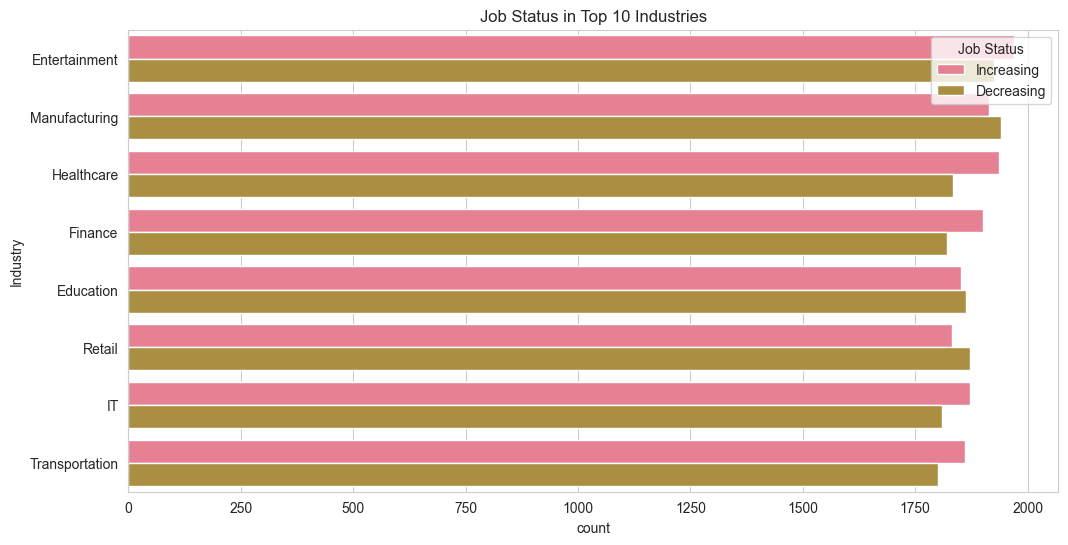

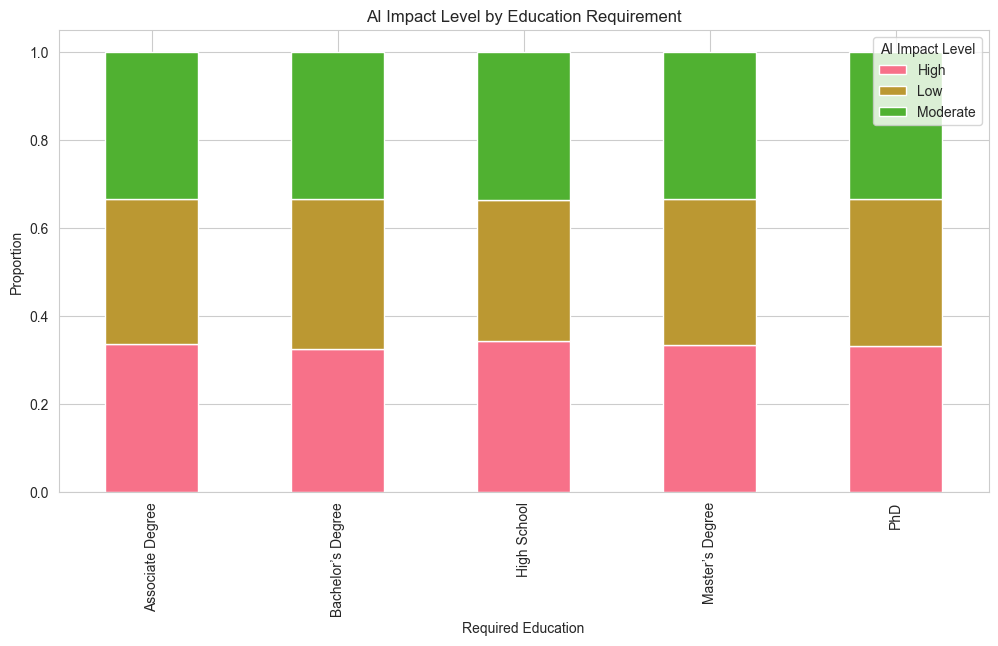

In [8]:
# Job Status by Industry (Top 10)
top_industries = df['Industry'].value_counts().index[:10]
plt.figure(figsize=(12, 6))
sns.countplot(y='Industry', hue='Job Status', 
              data=df[df['Industry'].isin(top_industries)],
              order=top_industries)
plt.title('Job Status in Top 10 Industries')
plt.show()

# AI Impact by Education
pd.crosstab(df['Required Education'], df['AI Impact Level'], 
            normalize='index').plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('AI Impact Level by Education Requirement')
plt.ylabel('Proportion')
plt.show()

Multivariate analysis
Salary vs Automation Risk by Industry

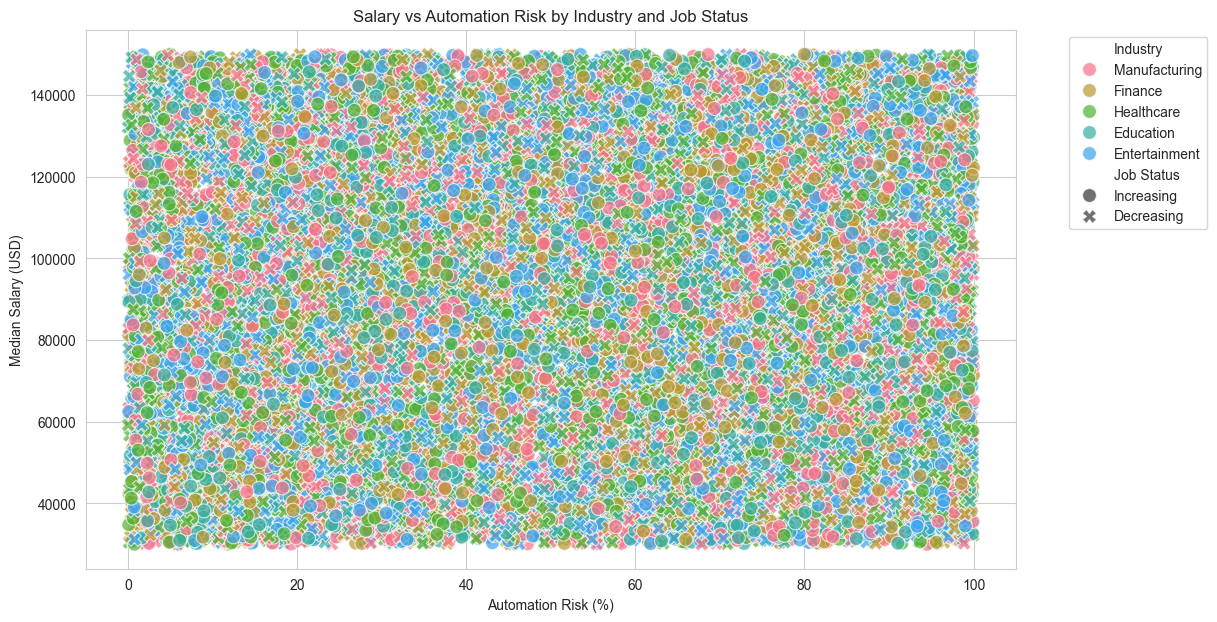

In [9]:
top_5_industries = df['Industry'].value_counts().index[:5]
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Automation Risk (%)', y='Median Salary (USD)',
                hue='Industry', style='Job Status',
                data=df[df['Industry'].isin(top_5_industries)],
                alpha=0.7, s=100)
plt.title('Salary vs Automation Risk by Industry and Job Status')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Faceted Growth Rate Analysis


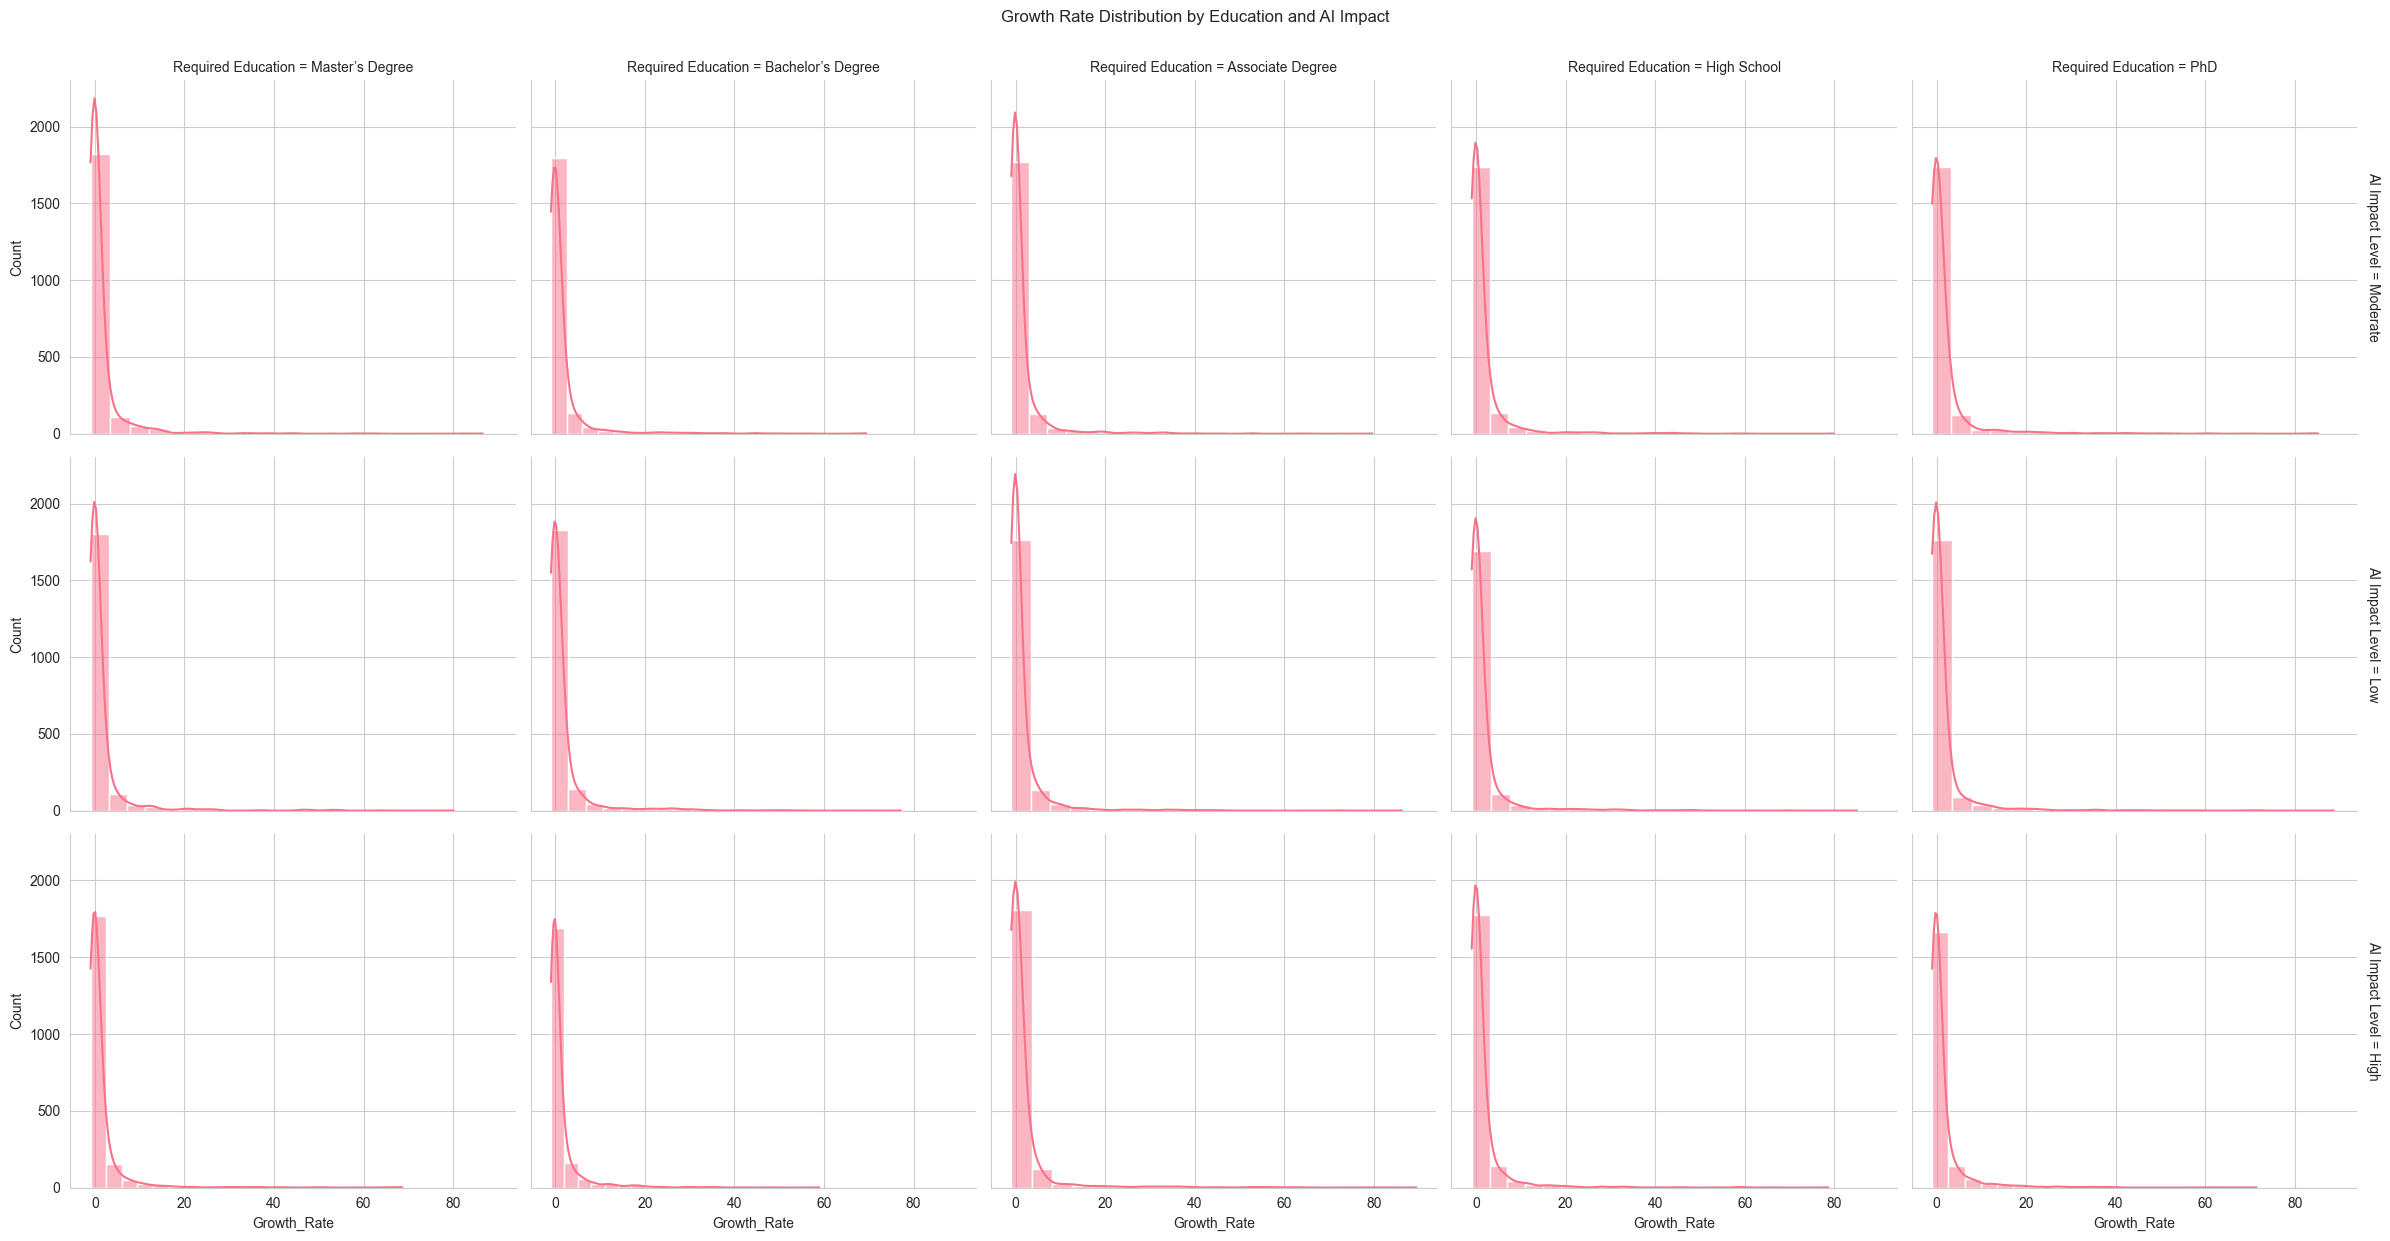

In [10]:
g = sns.FacetGrid(df, col='Required Education', row='AI Impact Level',
                  height=4, aspect=1.2, margin_titles=True)
g.map(sns.histplot, 'Growth_Rate', bins=20, kde=True)
g.fig.suptitle('Growth Rate Distribution by Education and AI Impact', y=1.03)
plt.show()

Top/Bottom 10 Jobs by Growth


In [11]:
# Top 10 growing jobs
top_growing = df.sort_values('Growth_Rate', ascending=False).head(10)[[
    'Job Title', 'Industry', 'Median Salary (USD)', 'Automation Risk (%)', 'Growth_Rate'
]]
print("Top 10 Fastest Growing Jobs:")
display(top_growing)

# Top 10 declining jobs
top_declining = df.sort_values('Growth_Rate').head(10)[[
    'Job Title', 'Industry', 'Median Salary (USD)', 'Automation Risk (%)', 'Growth_Rate'
]]
print("\nTop 10 Fastest Declining Jobs:")
display(top_declining)

Top 10 Fastest Growing Jobs:


Job Title        Industry  Median Salary (USD)  \
17086                 Sports coach   Manufacturing            104882.51   
18635    Learning disability nurse              IT             82792.80   
15255           Jewellery designer              IT            136706.09   
21536              Legal executive      Healthcare             85716.76   
181              Recycling officer              IT             68625.46   
11201                Advice worker       Education            116809.21   
18242  Corporate investment banker              IT            136711.54   
16234                    Paramedic  Transportation            108825.86   
1149      Technical sales engineer              IT             41579.94   
29448                Administrator         Finance            116298.84   

       Automation Risk (%)  Growth_Rate  
17086                 8.34    89.450980  
18635                29.12    88.710000  
15255                93.06    86.601852  
21536                85.08    86.250000  
181                  31.94    85.203883  
11201                26.20    85.057692  
18242                 4.93    84.000000  
16234                82.54    82.557522  
1149                 10.25    82.344538  
29448                95.67    82.190000


Top 10 Fastest Declining Jobs:


Job Title        Industry  \
18215                           Professor Emeritus  Transportation   
13779                        Clinical psychologist              IT   
15677                                  Adult nurse  Transportation   
19896                 IT technical support officer         Finance   
7134                                    Orthoptist       Education   
22748                       Psychologist, clinical         Finance   
8304   Psychologist, prison and probation services          Retail   
29031                              Publishing copy         Finance   
1972                                  Town planner      Healthcare   
5609                               Tourism officer      Healthcare   

       Median Salary (USD)  Automation Risk (%)  Growth_Rate  
18215             35755.03                19.78    -0.989370  
13779             87159.50                73.72    -0.988875  
15677             40089.55                41.39    -0.988488  
19896             99039.73                37.58    -0.987761  
7134              68340.57                48.58    -0.987153  
22748            133376.64                16.11    -0.986911  
8304             120489.41                89.77    -0.986641  
29031            121666.71                66.57    -0.986362  
1972              76484.42                72.39    -0.986311  
5609              73924.74                65.16    -0.985848

Salary vs Experience by AI Impact

<Figure size 1200x700 with 0 Axes>

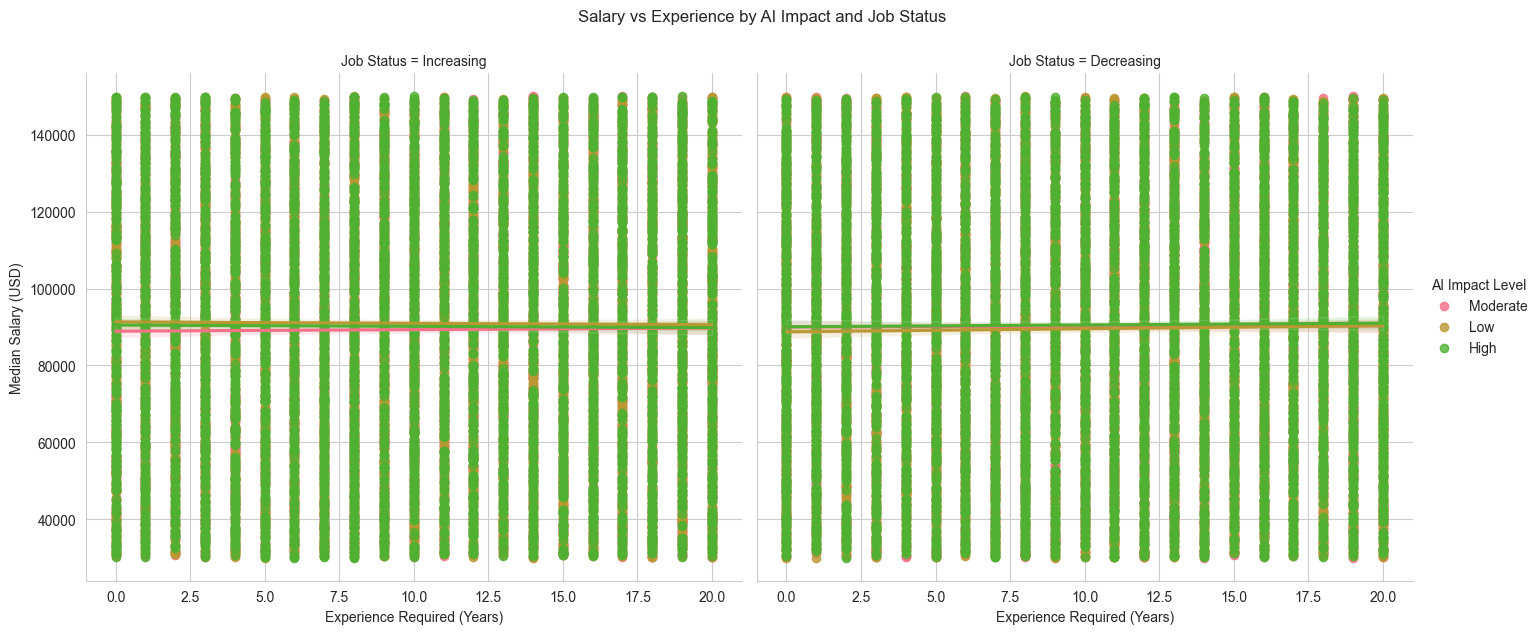

In [12]:
plt.figure(figsize=(12, 7))
sns.lmplot(x='Experience Required (Years)', y='Median Salary (USD)',
           hue='AI Impact Level', col='Job Status',
           data=df, height=6, aspect=1.2)
plt.suptitle('Salary vs Experience by AI Impact and Job Status', y=1.05)
plt.show()

Statistical Testing
T-tests for Significant Differences

In [18]:
# First import the required module at the top of your notebook/script
from scipy import stats

# Then run your comparison code
inc_sal = df[df['Job Status'] == 'Increasing']['Median Salary (USD)']
dec_sal = df[df['Job Status'] == 'Decreasing']['Median Salary (USD)']

t_stat, p_val = stats.ttest_ind(inc_sal, dec_sal)
print(f"Salary T-test Results:\nT-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")

if p_val < 0.05:
    print("\nConclusion: Significant difference in salaries between increasing and decreasing jobs (p < 0.05)")
else:
    print("\nConclusion: No significant difference in salaries")
print("\nNormality Check (Shapiro-Wilk):")
print("Increasing jobs:", stats.shapiro(inc_sal))
print("Decreasing jobs:", stats.shapiro(dec_sal))

u_stat, p_val = stats.mannwhitneyu(inc_sal, dec_sal)
print(f"\nMann-Whitney U Results:\nU-statistic = {u_stat:.2f}, p-value = {p_val:.4f}")

u_stat, p_val = stats.mannwhitneyu(inc_sal, dec_sal)
print(f"\nMann-Whitney U Results:\nU-statistic = {u_stat:.2f}, p-value = {p_val:.4f}")

def cohens_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1)**2 + (ny-1)*np.std(y, ddof=1)**2) / dof)

print("\nEffect Size (Cohen's d):", cohens_d(inc_sal, dec_sal))

Salary T-test Results:
T-statistic = 0.16, p-value = 0.8700

Conclusion: No significant difference in salaries

Normality Check (Shapiro-Wilk):
Increasing jobs: ShapiroResult(statistic=0.9565877356826632, pvalue=1.6906692343823573e-54)
Decreasing jobs: ShapiroResult(statistic=0.9561896757807913, pvalue=2.4354426744327705e-54)

Mann-Whitney U Results:
U-statistic = 112615739.00, p-value = 0.8676

Mann-Whitney U Results:
U-statistic = 112615739.00, p-value = 0.8676

Effect Size (Cohen's d): 0.0018893918074986726


c:\Users\abida\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15136.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\abida\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14864.
  res = hypotest_fun_out(*samples, **kwds)


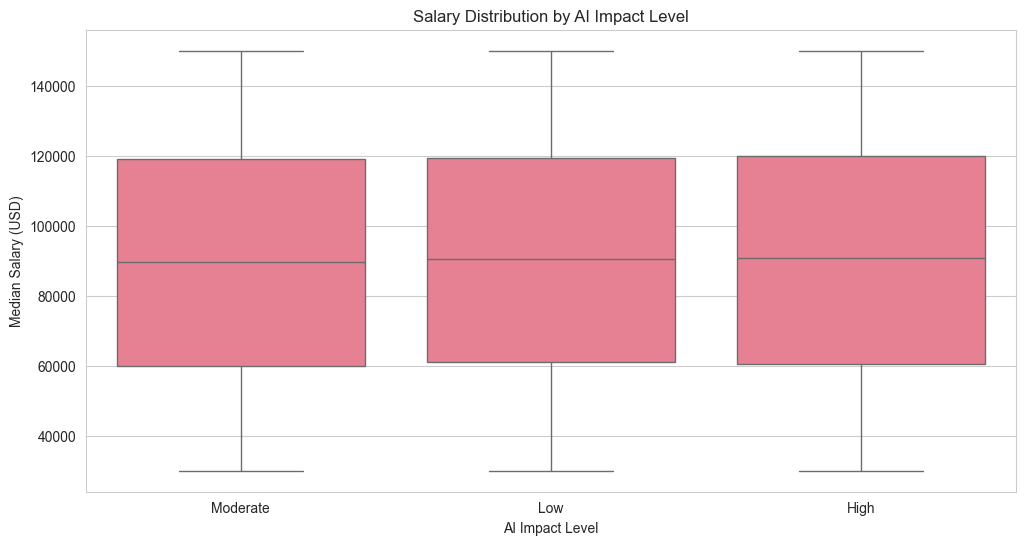

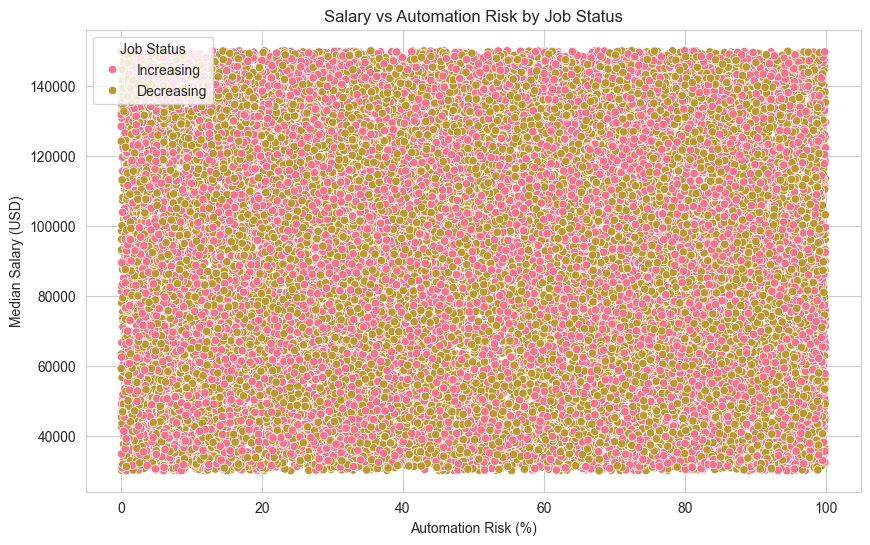

In [16]:
# Save important plots for report
fig1 = plt.figure(figsize=(12, 6))
sns.boxplot(x='AI Impact Level', y='Median Salary (USD)', data=df)
plt.title('Salary Distribution by AI Impact Level')
fig1.savefig('../reports/figures/salary_vs_ai_impact.png', dpi=300, bbox_inches='tight')

fig2 = plt.figure(figsize=(10, 6))
sns.scatterplot(x='Automation Risk (%)', y='Median Salary (USD)', hue='Job Status', data=df)
plt.title('Salary vs Automation Risk by Job Status')
fig2.savefig('../reports/figures/salary_vs_automation.png', dpi=300, bbox_inches='tight')

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<Predictive Modeling & Advanced Analysis>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Feature Engineering for Modeling

In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Create target variable
df['target'] = df['Job Status'].apply(lambda x: 1 if x == 'Increasing' else 0)

# Encode categorical features
cat_cols = ['Industry', 'Required Education', 'Location', 'AI Impact Level', 'Risk_Category']
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

# Select features and target
features = ['Industry', 'Median Salary (USD)', 'Required Education', 
            'Experience Required (Years)', 'Remote Work Ratio (%)',
            'Automation Risk (%)', 'AI Impact Level', 'Risk_Category']
X = df[features]
y = df['target']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train-Test Split

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

Training samples: 24000
Test samples: 6000


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<Model Building & Evaluation>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Random Forest Classifier

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      2973
           1       0.51      0.50      0.51      3027

    accuracy                           0.50      6000
   macro avg       0.50      0.50      0.50      6000
weighted avg       0.50      0.50      0.50      6000

AUC-ROC: 0.51


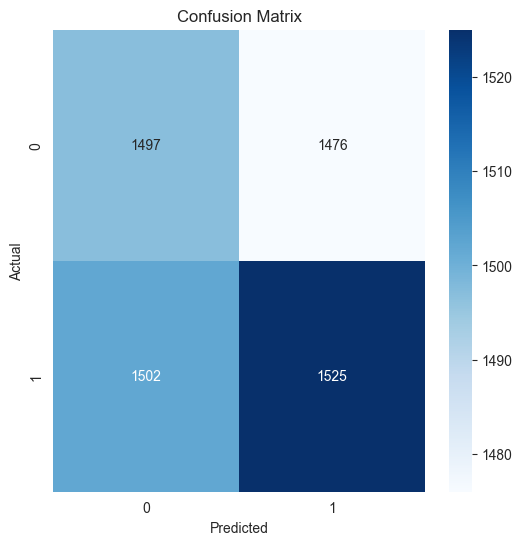

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize and train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Random Forest Performance:")
print(classification_report(y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.2f}")

# Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Feature Importance

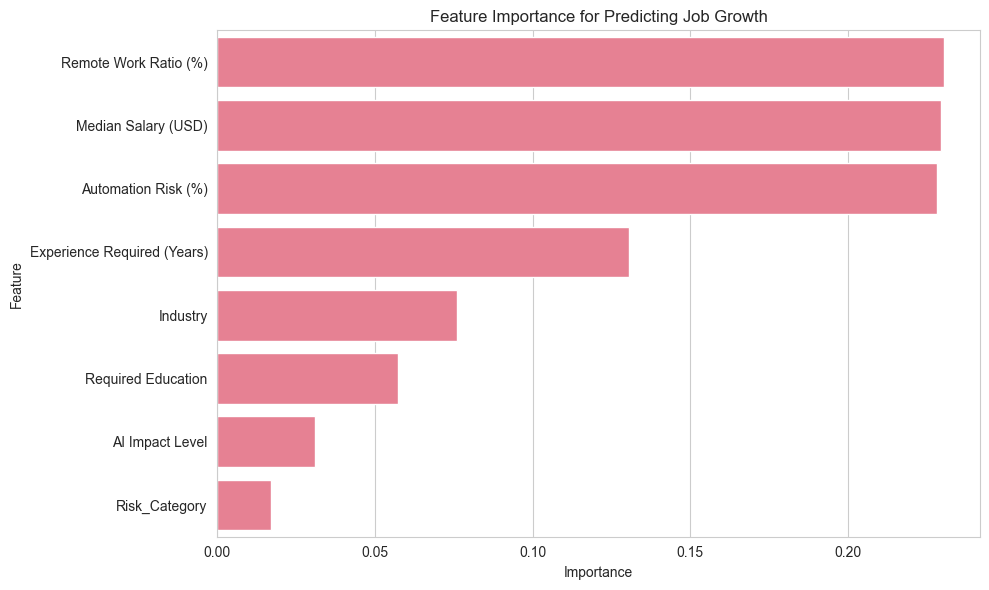

In [22]:
# Get feature importances
importances = pd.DataFrame({
    'Feature': features,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Feature Importance for Predicting Job Growth')
plt.tight_layout()
plt.show()

Hyperparameter Tuning

In [23]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Grid search
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc'
)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV AUC: {grid_search.best_score_:.2f}")

Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best CV AUC: 0.50


Model Interpretation (SHAP Values)

In [30]:
# Use only top important features
important_features = ['Automation Risk (%)', 'Median Salary (USD)', 
                     'AI Impact Level', 'Required Education']
X = df[important_features]

print("\nClass Distribution:")
print(df['Job Status'].value_counts(normalize=True))
# If imbalanced, add class_weight='balanced' to RandomForest


Class Distribution:
Job Status
Increasing    0.504533
Decreasing    0.495467
Name: proportion, dtype: float64


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< AUC is 0.50 is problematic  lets do some other models >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

# Feature selection (using top important features)
features = ['Automation Risk (%)', 'Median Salary (USD)', 
            'AI Impact Level', 'Required Education', 
            'Experience Required (Years)', 'Remote Work Ratio (%)']
X = df[features]
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    scores = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba) if y_proba is not None else None,
        'CV Score (5-fold)': cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
    }
    return scores

In [33]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_scores = evaluate_model(lr, X_train_scaled, y_train, X_test_scaled, y_test)

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_scores = evaluate_model(dt, X_train_scaled, y_train, X_test_scaled, y_test)

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=5,
    class_weight='balanced',
    random_state=42
)
rf_scores = evaluate_model(rf, X_train_scaled, y_train, X_test_scaled, y_test)

In [38]:

from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    random_state=42
)
xgb_scores = evaluate_model(xgb, X_train_scaled, y_train, X_test_scaled, y_test)

In [39]:
from sklearn.svm import SVC

svm = SVC(
    kernel='rbf',
    C=1.0,
    probability=True,
    class_weight='balanced',
    random_state=42
)
svm_scores = evaluate_model(svm, X_train_scaled, y_train, X_test_scaled, y_test)

In [40]:
results = pd.DataFrame({
    'Logistic Regression': lr_scores,
    'Decision Tree': dt_scores,
    'Random Forest': rf_scores,
    'XGBoost': xgb_scores,
    'SVM': svm_scores
}).T

print("Model Performance Comparison:")
display(results.style.background_gradient(cmap='Blues', subset=['ROC-AUC', 'F1-Score']))

Model Performance Comparison:


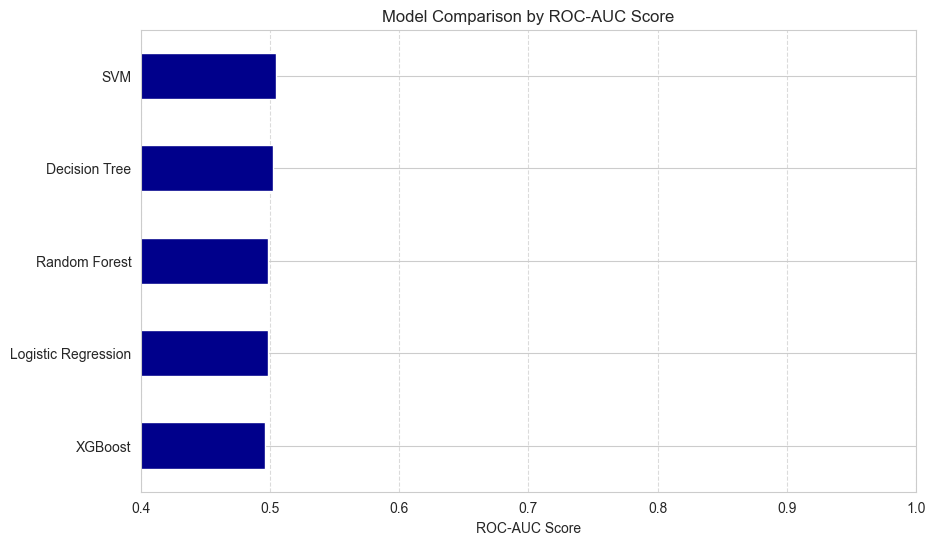

In [41]:
plt.figure(figsize=(10, 6))
results['ROC-AUC'].sort_values().plot(kind='barh', color='darkblue')
plt.title('Model Comparison by ROC-AUC Score')
plt.xlabel('ROC-AUC Score')
plt.xlim(0.4, 1.0)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

class imbalancing check 

In [42]:
print(df['target'].value_counts(normalize=True))

target
1    0.504533
0    0.495467
Name: proportion, dtype: float64


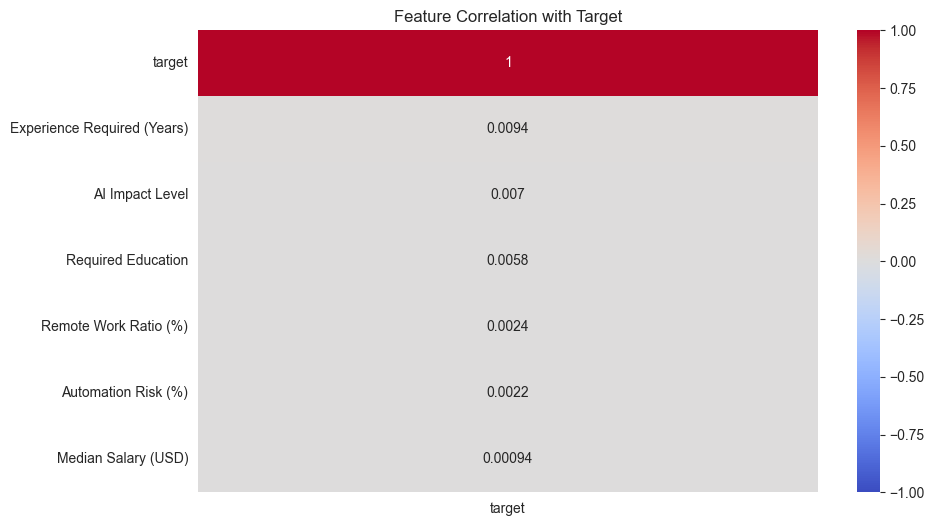

In [43]:
# Correlation analysis
corr_matrix = df[features + ['target']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix[['target']].sort_values('target', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation with Target')
plt.show()

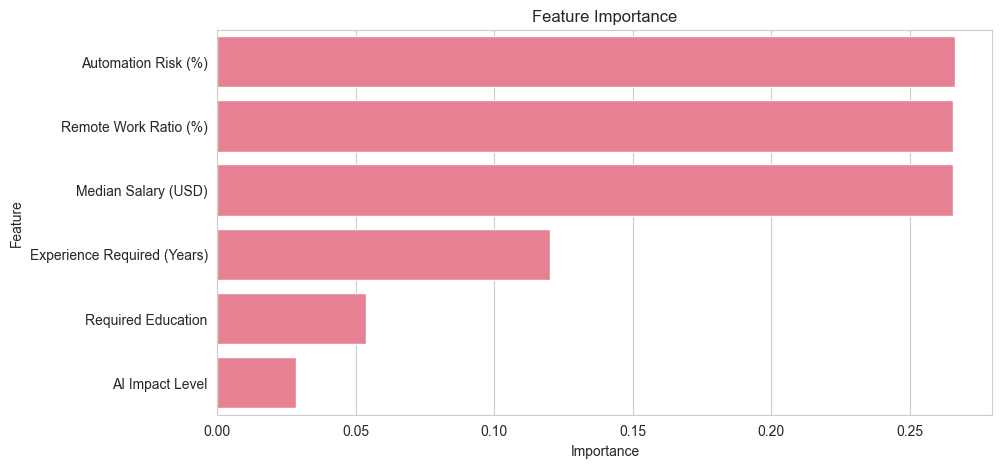

In [44]:
# Quick Random Forest importance check
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = pd.DataFrame({
    'Feature': features,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Feature Importance')
plt.show()

In [45]:
# Look for suspiciously high correlations (>0.9)
high_corr = corr_matrix[(corr_matrix.abs() > 0.9) & (corr_matrix != 1)]
print("Suspiciously high correlations:\n", high_corr.stack())

# Check if any features directly contain target information
for col in features:
    unique_ratio = len(df[col].unique())/len(df)
    if unique_ratio < 0.05:  # Suspect categorical feature
        print(f"\nPotential leakage in {col}:")
        print(pd.crosstab(df[col], df['target'], normalize='columns'))

Suspiciously high correlations:
 Series([], dtype: float64)

Potential leakage in AI Impact Level:
target                  0         1
AI Impact Level                    
0                0.335912  0.331131
1                0.332683  0.330867
2                0.331405  0.338002

Potential leakage in Required Education:
target                     0         1
Required Education                    
0                   0.200686  0.199524
1                   0.204521  0.205206
2                   0.198937  0.194437
3                   0.205665  0.200846
4                   0.190191  0.199987

Potential leakage in Experience Required (Years):
target                              0         1
Experience Required (Years)                    
0                            0.050928  0.047040
1                            0.048170  0.045190
2                            0.047968  0.045587
3                            0.046219  0.046512
4                            0.044335  0.045785
5                  

In [46]:
# Create interaction features
df['salary_risk'] = df['Median Salary (USD)'] * df['Automation Risk (%)']
df['education_experience'] = df['Required Education'] * df['Experience Required (Years)']

# Update features
features += ['salary_risk', 'education_experience']

In [47]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Neural Network
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000)
mlp_scores = evaluate_model(mlp, X_train_scaled, y_train, X_test_scaled, y_test)

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100)
gb_scores = evaluate_model(gb, X_train_scaled, y_train, X_test_scaled, y_test)

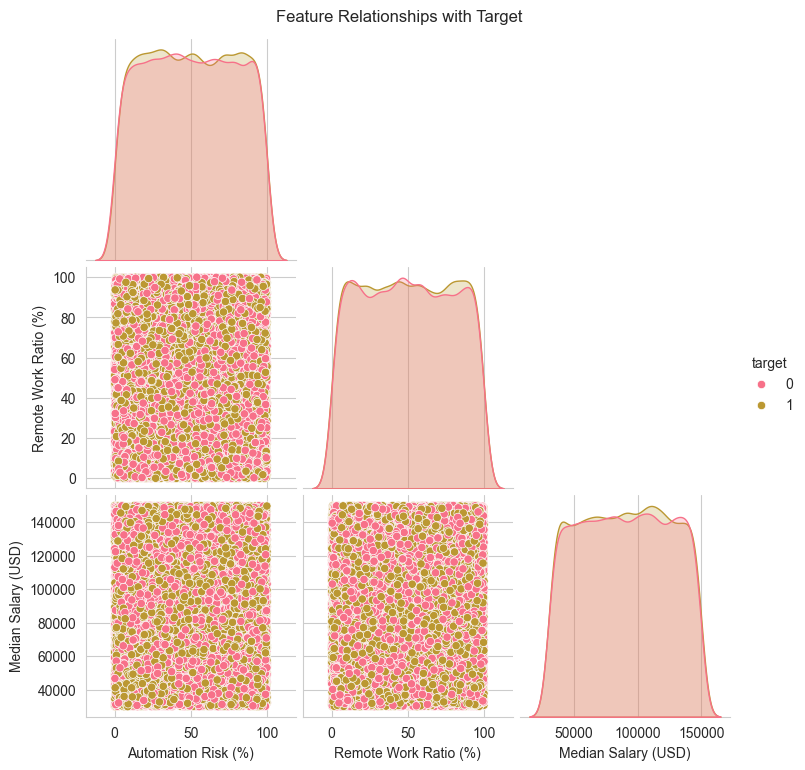

In [48]:
# Pairplot of top features
top_features = importances['Feature'].head(3).tolist() + ['target']
sns.pairplot(df[top_features], hue='target', corner=True)
plt.suptitle('Feature Relationships with Target', y=1.02)
plt.show()

Highest Risk Jobs:


Job Title  Industry  Automation Risk (%)  \
18947                          Meteorologist         0                99.99   
14665           Fast food restaurant manager         7                99.99   
3287                    Engineer, electrical         4                99.98   
26124               Advertising art director         2                99.98   
3691                    Designer, multimedia         0                99.98   
12714                         Water engineer         2                99.98   
6539                Teacher, adult education         1                99.97   
3147             Conservator, museum/gallery         3                99.97   
3808                     Surveyor, insurance         7                99.97   
14757  Medical laboratory scientific officer         5                99.97   

       Median Salary (USD)  
18947            129589.14  
14665            125412.03  
3287              44683.91  
26124            122260.80  
3691              35545.20  
12714             71434.46  
6539             113446.92  
3147              32196.66  
3808             111235.68  
14757             73567.16

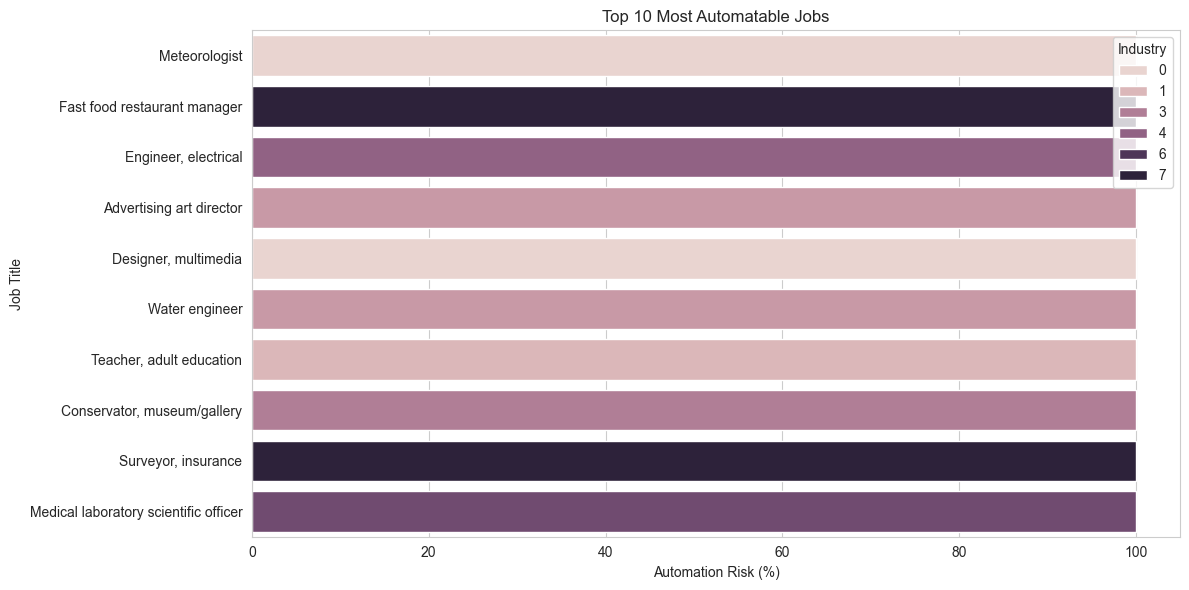

In [50]:
# Top 10 most automatable jobs
high_risk = df.sort_values('Automation Risk (%)', ascending=False).head(10)[[
    'Job Title', 'Industry', 'Automation Risk (%)', 'Median Salary (USD)'
]]
print("Highest Risk Jobs:")
display(high_risk)

# Visualization
plt.figure(figsize=(12,6))
sns.barplot(y='Job Title', x='Automation Risk (%)', data=high_risk, hue='Industry', dodge=False)
plt.title('Top 10 Most Automatable Jobs')
plt.tight_layout()
plt.savefig('../reports/figures/high_risk_jobs.png', dpi=300)

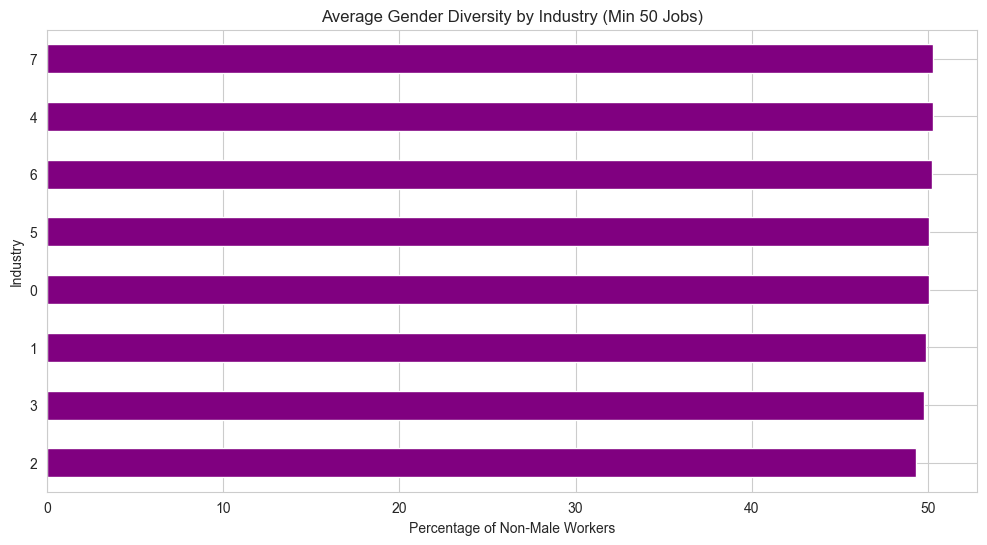

In [52]:
# Gender diversity by industry
div_by_industry = df.groupby('Industry')['Gender Diversity (%)'].agg(['mean', 'count'])
div_by_industry = div_by_industry[div_by_industry['count'] > 50].sort_values('mean')

# Visualization
plt.figure(figsize=(12,6))
div_by_industry['mean'].plot(kind='barh', color='purple')
plt.title('Average Gender Diversity by Industry (Min 50 Jobs)')
plt.xlabel('Percentage of Non-Male Workers')
plt.savefig('../reports/figures/gender_by_industry.png', dpi=300)

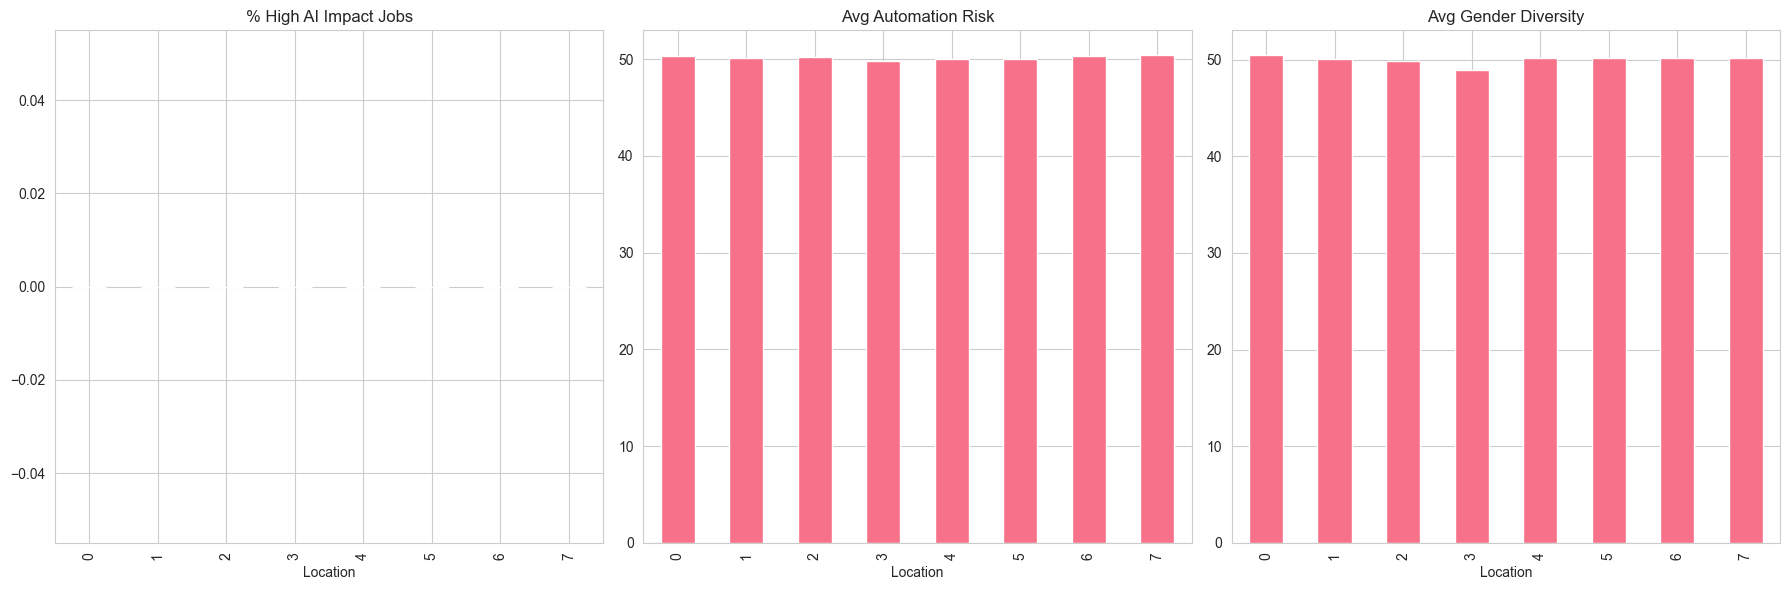

In [54]:
# AI impact by country
country_impact = df.groupby('Location').agg({
    'AI Impact Level': lambda x: (x == 'High').mean(),
    'Automation Risk (%)': 'mean',
    'Gender Diversity (%)': 'mean'
}).sort_values('AI Impact Level', ascending=False)

# Visualization
fig, ax = plt.subplots(1,3, figsize=(18,6))
country_impact['AI Impact Level'].head(10).plot(kind='bar', ax=ax[0], title='% High AI Impact Jobs')
country_impact['Automation Risk (%)'].head(10).plot(kind='bar', ax=ax[1], title='Avg Automation Risk')
country_impact['Gender Diversity (%)'].head(10).plot(kind='bar', ax=ax[2], title='Avg Gender Diversity')
plt.tight_layout()
plt.savefig('../reports/figures/country_comparison.png', dpi=300)

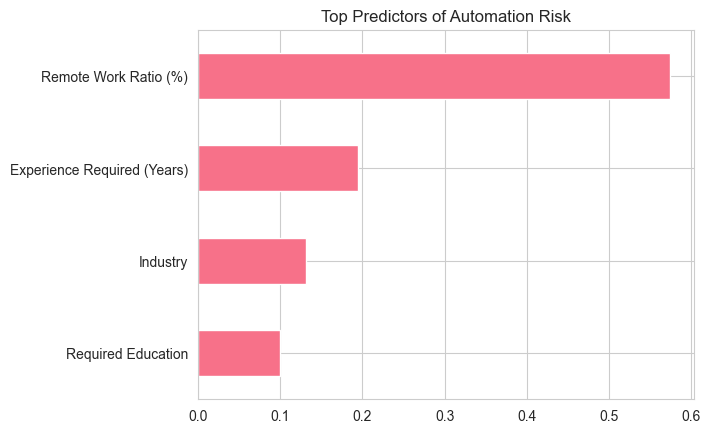

In [56]:
from sklearn.ensemble import RandomForestRegressor

# Prepare data
X = df[['Industry', 'Required Education', 'Experience Required (Years)', 'Remote Work Ratio (%)']]
X = pd.get_dummies(X)
y = df['Automation Risk (%)']

# Train model
model = RandomForestRegressor()
model.fit(X, y)

# Feature importance
pd.Series(model.feature_importances_, index=X.columns).sort_values().tail(10).plot(kind='barh')
plt.title('Top Predictors of Automation Risk')
plt.savefig('../reports/figures/automation_predictors.png', dpi=300)